In [1]:
!pip install kaggle
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install tensorflow
!pip install numpy scipy scikit-learn

  Using cached kaggle-1.5.16-py3-none-any.whl
  Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
  Using cached python_slugify-8.0.1-py2.py3-none-any.whl (9.7 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\PARAM M. SURELIYA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\PARAM M. SURELIYA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


  Using cached pandas-2.1.3-cp310-cp310-win_amd64.whl (10.7 MB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\PARAM M. SURELIYA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\PARAM M. SURELIYA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\PARAM M. SURELIYA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip



  Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.15.0-cp310-cp310-win_amd64.whl (300.9 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.10.0-cp310-cp310-win_amd64.whl (2.7 MB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-win_amd64.whl (938 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached wrapt-1.14.1-cp310-cp310-win_amd64.whl (35 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached grpcio-1.59.3-cp310-cp310-win_amd64.whl (3.7 MB)
  Using cached tensorboard-2.15.1-py3-none-any.whl (5.5 MB)
  Using cached tensorflow_estimator-2.


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\PARAM M. SURELIYA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [3]:
from zipfile import ZipFile

zf = ZipFile(r'C:\Users\PARAM M. SURELIYA\PycharmProjects\Sign Language MNIST Kaggle\archive.zip')
zf.extractall(r'C:\Users\PARAM M. SURELIYA\PycharmProjects\Sign Language MNIST Kaggle')
zf.close()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.python import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping

In [5]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
# Displaying class labels (training data)
np.unique(train["label"].values)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [7]:
x_train = train.drop('label', axis= 1)
y_train = train['label']
print(x_train.shape)
y_train.head()
x_train.head()

(27455, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(3,3))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(26,activation = 'softmax'))


In [9]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])


In [11]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10,verbose=2,restore_best_weights=True)
history = model.fit(x_train.values.reshape(-1,28,28,1),y_train,epochs =100, batch_size=256,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
86/86 [==============================] - 5s 64ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 0.9998
Epoch 2/100
86/86 [==============================] - 8s 95ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 0.9996
Epoch 3/100
86/86 [==============================] - 7s 85ms/step - loss: 8.1487e-04 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 4/100
86/86 [==============================] - 7s 87ms/step - loss: 6.5275e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 5/100
86/86 [==============================] - 7s 84ms/step - loss: 5.0976e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 0.9998
Epoch 6/100
86/86 [==============================] - 7s 79ms/step - loss: 3.9913e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 7/100
86/86 [==============================] - 7s 83ms/step - loss: 3.5412e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_acc

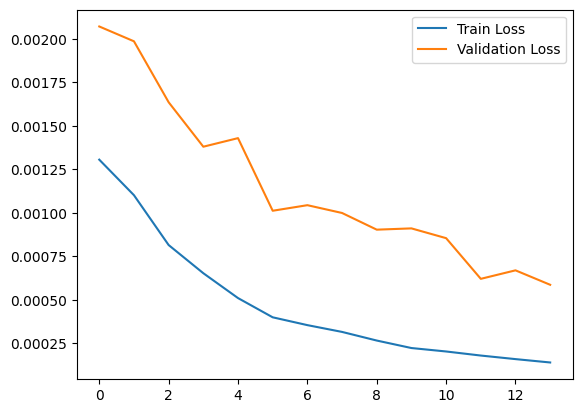

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [13]:
x_test = test.drop('label', axis=1)  # Features
x_test = x_test.values.reshape(-1, 28, 28, 1)
y_test = test['label']  # Labels
# Evaluate the model on the test data
evaluation = model.evaluate(x_test, y_test)

# Print the evaluation results
print(f"Test Loss: {evaluation[0]}")
print(f"Test Accuracy: {evaluation[1]}")

225/225 [==============================] - 1s 5ms/step - loss: 0.5063 - accuracy: 0.8802
Test Loss: 0.5062528848648071
Test Accuracy: 0.8802286386489868


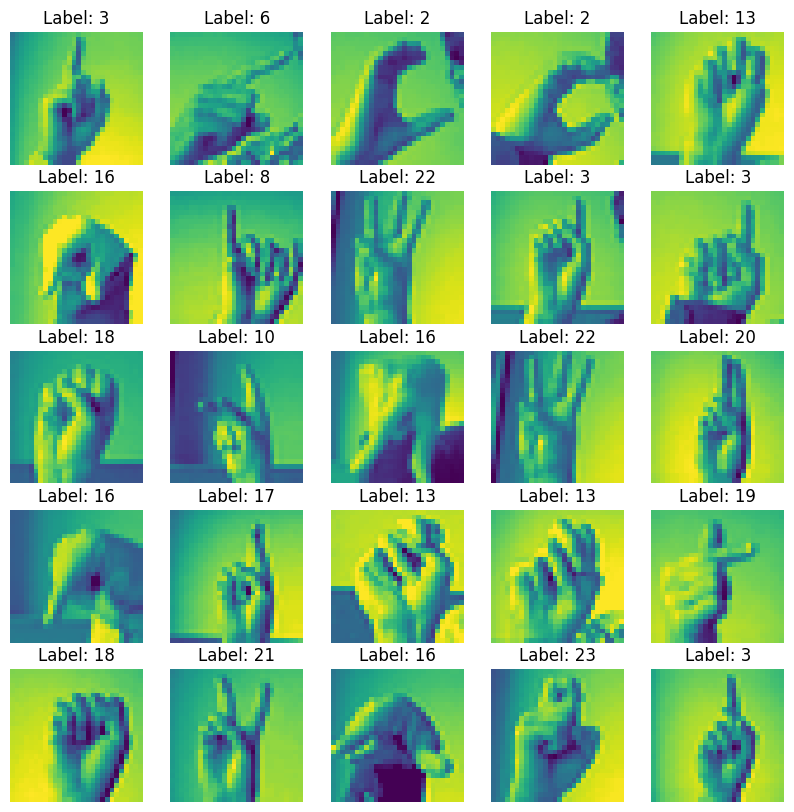

In [14]:
# Visualize some initial data
plt.figure(figsize=(10, 10))
for i in range(25):  # Change the range to the number of samples you want to visualize
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train.values[i].reshape(28, 28))
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

# Save the initial data plot

plt.show()


In [15]:
# Save the trained model in native Keras format
model.save('sign_language_cnn_model.keras')